# Acquire data and deal with large dataset (~ 1.45 GB)

`Depending on where you're reading this notebook, the large 'vehicles.csv' file may not be available alongside it. Should that be the case, the original dataset can be found in https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data `

A great solution for dealing with large datasets without needing to know more complex distributing frameworks, like PySpark, is reading our file using Dask. Dask is a flexible library for parallel computing in Python.

In [6]:
from dask import dataframe as dd
import time

start = time.time()
dask_df = dd.read_csv('vehicles.csv', dtype='object')
end = time.time()
print("Read csv with dask: ",(end-start),"sec")

Read csv with dask:  0.008811235427856445 sec


As you can see, it is capable of reading large datasets in less than a second. However, Dask isn't as advanced as Pandas for data manipulation. Since there would be no point in simply converting our Dask DF to a Pandas DF because of our dataset's large size, we'll take a random sample of it (~5%) and then convert it to Pandas DF.

In [7]:
dask_sample = dask_df.sample(frac=21334/len(dask_df), replace=None, random_state=0)
len(dask_sample)

21335

In [8]:
import pandas as pd

We need to use the Dask DF method _compute()_ in order to convert it into a Pandas DF, simply assigning our Dask sample won't work.

In [9]:
pandas_df = dask_sample.compute()

And here we go! A random sample of our large dataset in a Pandas DataFrame.

In [10]:
pandas_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
5956,7312391203,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,https://anchorage.craigslist.org,22995,2016,chevrolet,malibu lt,like new,4 cylinders,...,full-size,sedan,grey,https://images.craigslist.org/00a0a_8EkW6BOYga...,Frontier Auto Sales wants you to know we're ab...,NaN,ak,61.166252,-149.857916,2021-04-25T09:10:21-0800
8293,7308071331,https://kenai.craigslist.org/ctd/d/anchorage-2...,kenai peninsula,https://kenai.craigslist.org,5988,2010,NaN,Suzuki SX4,NaN,4 cylinders,...,NaN,sedan,grey,https://images.craigslist.org/00k0k_8e7PWjh7nx...,This 2010 Suzuki SX4 4dr Sdn Man LE FWD has be...,NaN,ak,61.1381,-149.86727,2021-04-16T18:07:52-0800
7631,7302864841,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,https://anchorage.craigslist.org,20995,2018,kia,sportage,NaN,NaN,...,NaN,wagon,NaN,https://images.craigslist.org/00O0O_dVc37lIvhB...,2018 Kia Sportage LX AWD 4dr SUV Offered b...,NaN,ak,61.16167,-149.86312,2021-04-06T14:31:39-0800
10979,7316440052,https://phoenix.craigslist.org/nph/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,500,2013,honda,civic,excellent,4 cylinders,...,compact,sedan,white,https://images.craigslist.org/00404_fM055rR9R4...,💥$500 DOWN!💥 ✔2ND CHANCE CREDIT WE ARE HERE FO...,NaN,az,33.3851,-111.8724,2021-05-03T14:22:42-0700
10620,7316543436,https://phoenix.craigslist.org/nph/ctd/d/scott...,phoenix,https://phoenix.craigslist.org,39999,2001,NaN,International F650,good,6 cylinders,...,full-size,truck,white,https://images.craigslist.org/00101_hoOrBo6qin...,This is a 2001 Freightliner FL70 High Top Cab ...,NaN,az,33.623732,-111.920958,2021-05-03T18:11:07-0700


In [11]:
len(pandas_df)

21335

Great. Now, just so that we don't have to run all this again and also be able to export this project with ease, we'll save this Pandas DF as a CSV with a reduced size.

In [12]:
pandas_df.to_csv('vehicles_reduced.csv', index=False) 

# EDA - Exploratory Data Analysis

Let's import our CSV file and make sure it was properly saved.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [156]:
df = pd.read_csv('vehicles_reduced.csv')
df.sample(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
1711,7306719247,https://merced.craigslist.org/cto/d/merced-200...,merced,https://merced.craigslist.org,1000,2007.0,ford,f-150,good,6 cylinders,...,full-size,truck,brown,https://images.craigslist.org/00K0K_7xA1uhywpE...,Please read details carefully motor runs great...,NaN,ca,37.295400,-120.465000,2021-04-14T09:27:40-0700
15904,7312005327,https://eugene.craigslist.org/ctd/d/gladstone-...,eugene,https://eugene.craigslist.org,0,2016.0,ford,f-350 super duty lariat di,NaN,8 cylinders,...,NaN,truck,NaN,https://images.craigslist.org/01313_gTmONaucca...,Carz Planet STOCK #: 6949 💲 💲 FOR...,NaN,or,45.385979,-122.608301,2021-04-24T12:01:16-0700
15089,7314291224,https://sandusky.craigslist.org/cto/d/port-cli...,sandusky,https://sandusky.craigslist.org,15000,1999.0,NaN,freightliner fl112,good,other,...,NaN,NaN,white,https://images.craigslist.org/01111_j9V9zN73Ak...,1999 Business Class Semi Tractor FL 112 Caterp...,NaN,oh,41.515208,-82.966856,2021-04-29T10:19:05-0400
10642,7316349565,https://fargo.craigslist.org/cto/d/comstock-20...,fargo / moorhead,https://fargo.craigslist.org,24750,2017.0,volkswagen,gti se,excellent,4 cylinders,...,NaN,hatchback,white,https://images.craigslist.org/00909_1zMc3D7thF...,2017 VW GTI with SE trim in excellent conditio...,NaN,mn,46.674341,-96.807661,2021-05-03T13:51:15-0500
13814,7311477362,https://longisland.craigslist.org/cto/d/commac...,long island,https://longisland.craigslist.org,21500,2015.0,bmw,528i,like new,4 cylinders,...,full-size,sedan,silver,https://images.craigslist.org/00000_2N36jTGyWD...,2015 BMW 528XI Drive 4Dr Sedan Cashmere Silver...,NaN,ny,40.836428,-73.269413,2021-04-23T14:24:40-0400
20539,7311842749,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,0,NaN,NaN,F-150,NaN,8 cylinders,...,NaN,pickup,white,https://images.craigslist.org/00c0c_bdLXYzYP5a...,2019 *Ford* *F-150* TruckCall or Text Us Toda...,NaN,wa,47.434493,-120.320759,2021-04-24T07:40:32-0700
20052,7312733408,https://richmond.craigslist.org/cto/d/glen-all...,richmond,https://richmond.craigslist.org,5900,2006.0,mercedes-benz,benz c280 4matic,excellent,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00d0d_1SZaeD818E...,Still available if you can see this ad. 117...,NaN,va,37.662800,-77.534000,2021-04-26T08:55:59-0400
6874,7313701618,https://lewiston.craigslist.org/ctd/d/salt-lak...,lewiston / clarkston,https://lewiston.craigslist.org,13950,2017.0,nissan,rogue awd,NaN,4 cylinders,...,NaN,SUV,black,https://images.craigslist.org/00202_5uefeOyVb9...,Engine: 4 Cylinders Transmission: Automatic Ti...,NaN,id,40.746047,-111.939311,2021-04-27T21:40:02-0700
13496,7316677947,https://longisland.craigslist.org/ctd/d/centra...,long island,https://longisland.craigslist.org,7499,1999.0,jeep,wrangler,excellent,6 cylinders,...,NaN,SUV,NaN,https://images.craigslist.org/00C0C_dmHF0ylKIs...,1999 Jeep Wrangler 2dr Sport SUV Ready To Up...,NaN,ny,40.786795,-73.218686,2021-05-04T09:45:58-0400
19620,7305193064,https://norfolk.craigslist.org/ctd/d/norfolk-2...,norfolk / hampton roads,https://norfolk.craigslist.org,0,2008.0,chevrolet,silverado 1500,NaN,8 cylinders,...,NaN,truck,blue,https://images.craigslist.org/00505_5uYRpT3EPT...,This 2008 Chevrolet Silverado 1500 1500 LT EXT...,NaN,va,36.918020,-76.200420,2021-04-11T12:32:49-0400


In [157]:
len(df)

21335

Now we will perform an exploratory data analysis (EDA) process, in order to better understand our data, check for outliers and missing values, make transformations and create hypothesis. Let's start with outliers.

In [ ]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [158]:
df.isna().sum()

id                  0
url                 0
region              0
region_url          0
price               0
year               60
manufacturer      849
model             238
condition        8807
cylinders        8935
fuel              138
odometer          200
title_status      400
transmission      125
VIN              7954
drive            6566
size            15345
type             4608
paint_color      6534
image_url           4
description         4
county          21335
state               0
lat               328
long              328
posting_date        4
dtype: int64

Ok, so we can see there seems to be a lot of missing information. Here's the approach we'll be using:<br>
- `The top 2 columns with most missing rows, "size" and "county", will be completely dropped, as attempting to impute some value in them will be almost the same as making up data.`<br>
- `Columns with less than 1000 missing values will simply have those rows dropped, since they won't make much difference considering the total size of this dataset.`<br>
- `Columns within the 1000 - 9000 range of missing values will be imputed with different strategies, since the amount of missing values may interfere with the results from generalistic strategies.`<br>

In [159]:
df.columns[df.isna().sum() < 1000]

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [160]:
df = df.drop(['size', 'county'], axis=1)
df = df.dropna(subset=df.columns[df.isna().sum() < 1000])

In [161]:
len(df)

19252

In [162]:
df.isna().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model              0
condition       7764
cylinders       8109
fuel               0
odometer           0
title_status       0
transmission       0
VIN             7076
drive           5780
type            4142
paint_color     5669
image_url          0
description        0
state              0
lat                0
long               0
posting_date       0
dtype: int64

Now, we're left with the columns that will have some sort of value imputed into them with some strategy. In order to figure out this strategy, we must understand what each of these columns mean.

In [163]:
df.condition.value_counts()

good         5775
excellent    4366
like new      990
fair          272
new            61
salvage        24
Name: condition, dtype: int64

In [45]:
df.drive.value_counts()

4wd    5896
fwd    4771
rwd    2549
Name: drive, dtype: int64

My hypothesis is that both condition and drive should have a strong correlation with the car's price. That being said, should we confirm this hypothesis, we'll be able to assign more accurate values to rows with missing information, which will help our model further down the line.

In [84]:
# We know sometimes missing values may come as 0 or 1, so we'll be taking care of those as well. No car is going to be free or cost 1.
df = df[(df.price != 0) & (df.price != 1)]

In [85]:
print('Column: Price')
print(pd.cut(df['price'], bins=3).value_counts())

Column: Price
(-53.496, 19169.333]      10446
(19169.333, 38334.667]     5723
(38334.667, 57500.0]       1417
Name: price, dtype: int64


We can see there are a few outliers here. Let's define our thresholds and select rows within our Interquartile Range.

In [86]:
Q1 = df['price'].quantile(.25)
Q3 = df['price'].quantile(.75)

#Interquatile range
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
higher_threshold = Q3 + 1.5 * IQR

print('Column: Price')
print('IIQ: ', IQR, '\nQ1: ', Q1, '\nQ3: ', Q3)
print('Lower threshold: ', lower_threshold, '\nHigher threshold: ', higher_threshold)

Column: Price
IIQ:  20005.0 
Q1:  7495.0 
Q3:  27500.0
Lower threshold:  -22512.5 
Higher threshold:  57507.5


In [87]:
df = df[(df['price'] >= lower_threshold) & (df['price'] <= higher_threshold)]

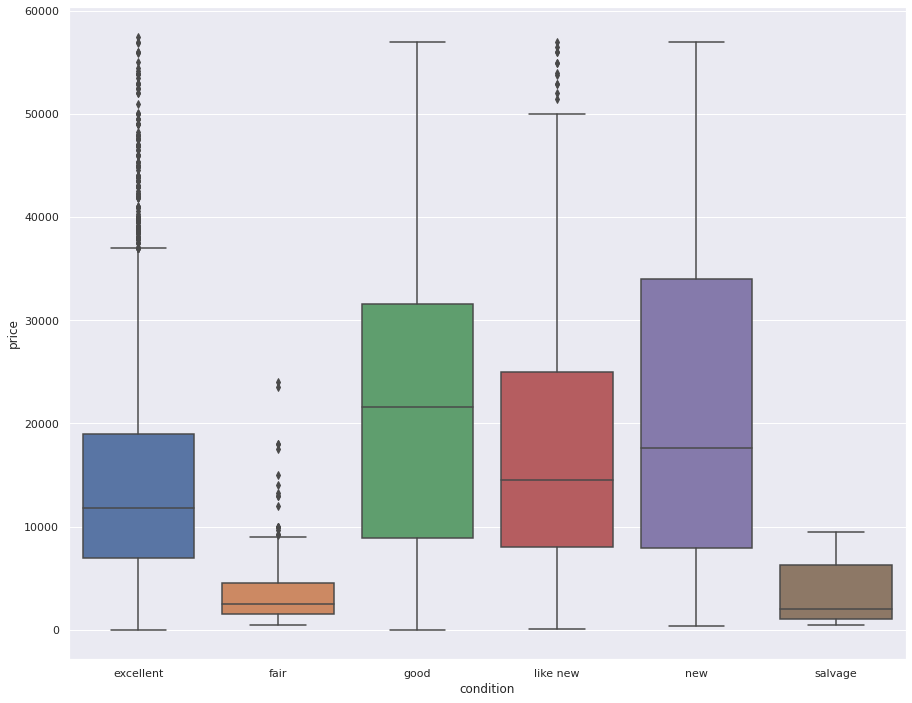

In [88]:
plt.figure(figsize=(15, 12))
with sns.axes_style("darkgrid"):
    g = sns.boxplot(x="condition", y="price", data=df)

So, this (kinda) confirms our hypothesis that the price is strongly correlated with the car's condition. I should admit I thought cars in "excellent", "like new" and "new" conditions would be higher above "good", though. Our result can also be a bit distorted considering we're only looking at roughly 5% of the original dataset. Maybe in your environment, your sample comes out different. Maybe you even have the capacity to process the whole dataset and get to different conclusions. But enough digressing. Let's check how drive affects the price.

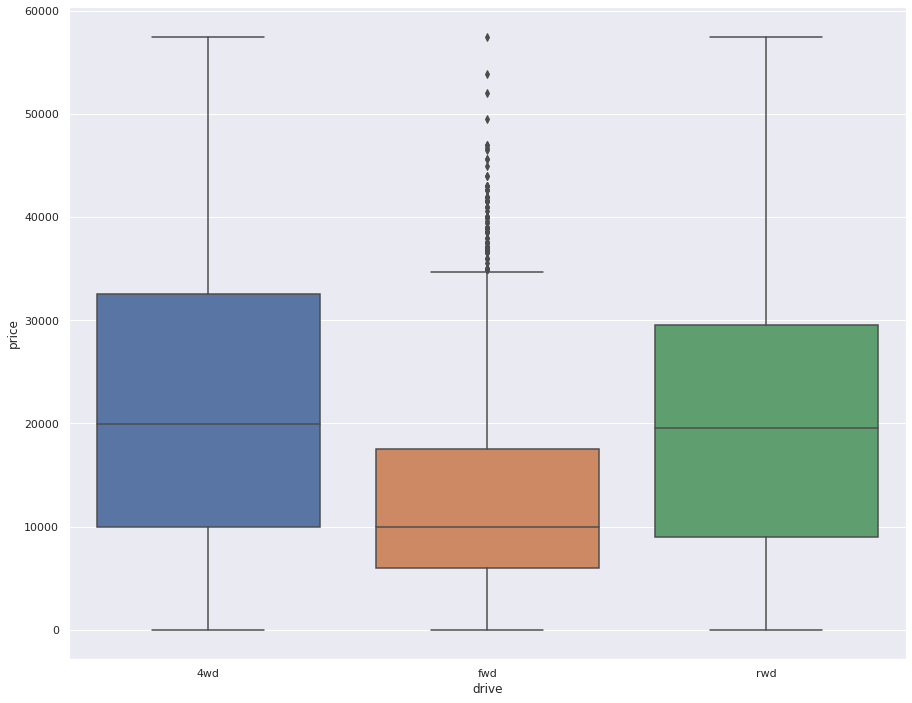

In [89]:
plt.figure(figsize=(15, 12))
with sns.axes_style("darkgrid"):
    g = sns.boxplot(x="drive", y="price", data=df)

Who would know, eh? Turns out 4wd and rwd drive truly add some value to the machine. Great, now we have a bit more orientation as how to input our missing values in both the "condition" and "drive" columns.<br>
<br>
> Obs: it's totally possible to take a deeper look with this logic into a lot more columns, and with more understanding of the data make more accurate imputations, hypothesis and maybe even model tunning. We just won't be doing this here.<br>

I will split our DF into price ranges based on the price variation with each column's value, perform the imputation using the most common label for each column in that price range, then assemble our DF back again. Kinda like a data megazord.

In [125]:
df_conditions = [
    df[df.price <= 5000],
    df[(df.price > 5000) & (df.price <= 10000)],
    df[(df.price > 10000) & (df.price <= 20000)],
    df[(df.price > 20000) & (df.price <= 25000)],
    df[df.price > 25000]
]

for dataframe in df_conditions:
    dataframe['condition'] = dataframe['condition'].fillna(dataframe['condition'].mode()[0])
    
df = pd.concat(df_conditions)
df.sample(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
19078,7304003443,https://mcallen.craigslist.org/cto/d/mcallen-1...,mcallen / edinburg,https://mcallen.craigslist.org,7500,1985.0,chevrolet,corvette,excellent,8 cylinders,...,NaN,fwd,sedan,red,https://images.craigslist.org/00X0X_atC4ZzW4oM...,"1985 Corvette, T-top, color red, V-8 Automatic...",tx,26.215900,-98.325300,2021-04-08T21:57:28-0500
12425,7312945541,https://cnj.craigslist.org/ctd/d/trenton-2019-...,central NJ,https://cnj.craigslist.org,37990,2019.0,tesla,model 3 standard range,good,NaN,...,5YJ3E1EA9KF415988,rwd,sedan,white,https://images.craigslist.org/00S0S_c7U7fnaC3N...,Carvana is the safer way to buy a car During t...,nj,40.220000,-74.760000,2021-04-26T14:41:01-0400
8954,7309322659,https://neworleans.craigslist.org/ctd/d/metair...,new orleans,https://neworleans.craigslist.org,11995,2006.0,chevrolet,silverado 1500,excellent,8 cylinders,...,1GCEC19T66Z126951,rwd,pickup,black,https://images.craigslist.org/00y0y_cnQCWoFiuF...,This 2006 Chevrolet Silverado 1500 Exteded Cab...,la,29.993717,-90.181751,2021-04-19T12:01:04-0500
19046,7313810858,https://sanantonio.craigslist.org/cto/d/austin...,san antonio,https://sanantonio.craigslist.org,11999,2007.0,audi,s8,excellent,10 cylinders,...,WAUPN44E57N018534,4wd,NaN,NaN,https://images.craigslist.org/00202_7eMysQUklr...,Located in Austin I am selling my 2007 Audi S8...,tx,30.376400,-97.707800,2021-04-28T09:41:26-0500
10047,7302195958,https://jxn.craigslist.org/ctd/d/battle-creek-...,jackson,https://jxn.craigslist.org,7900,2007.0,ford,f150,excellent,NaN,...,NaN,fwd,NaN,NaN,https://images.craigslist.org/01010_3l7VD5flcE...,ONLY 134K MILES! XL! 4X4! Runs GREAT! 5.4L V8!...,mi,42.303000,-85.130400,2021-04-05T14:27:52-0400
20744,7317013675,https://yakima.craigslist.org/ctd/d/parker-200...,yakima,https://yakima.craigslist.org,12995,2005.0,ford,mustang,excellent,8 cylinders,...,1ZVFT82H455134083,rwd,coupe,red,https://images.craigslist.org/00W0W_263aJDpYd4...,2005 Ford Mustang GT Deluxe 2dr Fastback -- $1...,wa,46.553190,-120.475680,2021-05-04T16:30:28-0700
1266,7313434808,https://chico.craigslist.org/ctd/d/redding-201...,chico,https://chico.craigslist.org,13988,2017.0,dodge,journey,excellent,NaN,...,3C4PDDBG5HT522366,fwd,NaN,NaN,https://images.craigslist.org/00V0V_452ziQugTS...,2017 Dodge Journey by Lithia Toyota of Reddin...,ca,40.572180,-122.368589,2021-04-27T11:04:31-0700
8899,7314892785,https://baltimore.craigslist.org/ctd/d/joppa-2...,baltimore,https://baltimore.craigslist.org,2900,2005.0,ford,explorer,fair,6 cylinders,...,1FMZU73K25UB57638,4wd,SUV,NaN,https://images.craigslist.org/00t0t_f7IYEHRB0T...,This 2005 Ford Explorer has been SOLD but call...,md,39.433086,-76.343119,2021-04-30T13:23:13-0400
6137,7310555952,https://treasure.craigslist.org/cto/d/stuart-p...,treasure coast,https://treasure.craigslist.org,1500,2002.0,ford,f350 super duty,fair,10 cylinders,...,NaN,fwd,NaN,NaN,https://images.craigslist.org/00b0b_akEBgUi5jS...,PARTS ONLY! Truck hit from behind... NO TITLE...,fl,27.165600,-80.291600,2021-04-21T17:12:52-0400
12727,7308632306,https://cnj.craigslist.org/cto/d/east-brunswic...,central NJ,https://cnj.craigslist.org,8500,2017.0,mitsubishi,mirage g4,like new,3 cylinders,...,NaN,fwd,sedan,blue,https://images.craigslist.org/00a0a_aDlFKRUt7n...,Mitsubishi Mirage G4 26540 Miles Power Door ...,nj,40.428400,-74.406400,2021-04-18T02:47:17-0400


In [126]:
df.condition.isna().sum()

0

In [127]:
df_drive = [
    df[df.price <= 17000],
    df[df.price > 17000]
]

for dataframe in df_drive:
    dataframe['drive'] = dataframe['drive'].fillna(dataframe['drive'].mode()[0])
    
df = pd.concat(df_drive)
df.sample(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,VIN,drive,type,paint_color,image_url,description,state,lat,long,posting_date
3966,7309243964,https://cosprings.craigslist.org/ctd/d/las-veg...,colorado springs,https://cosprings.craigslist.org,38777,2012.0,ford,f-350 super duty super duty,good,NaN,...,NaN,4wd,NaN,NaN,https://images.craigslist.org/00J0J_9UB0vIVAJc...,2012* Ford* XL* F-350* F350* F 350* _Tommy Lif...,co,36.114900,-115.216100,2021-04-19T09:11:47-0600
18111,7312062154,https://austin.craigslist.org/cto/d/austin-sex...,austin,https://austin.craigslist.org,6000,1990.0,mercedes-benz,benz se,good,6 cylinders,...,NaN,fwd,NaN,NaN,https://images.craigslist.org/00m0m_iLWDgQ47jf...,"Dark blue almost black navy baby. Fresh oil, b...",tx,30.226753,-97.714977,2021-04-24T15:39:39-0500
7529,7313524615,https://stlouis.craigslist.org/ctd/d/saint-lou...,"st louis, MO",https://stlouis.craigslist.org,13995,2016.0,honda,cr-v,excellent,4 cylinders,...,2HKRM3H3XGH539198,fwd,SUV,black,https://images.craigslist.org/00z0z_f16WtPVTzL...,This 2016 Honda CR-V LX has been SOLD but call...,il,38.531326,-90.384547,2021-04-27T15:34:35-0500
2258,7312034579,https://palmsprings.craigslist.org/ctd/d/palm-...,palm springs,https://palmsprings.craigslist.org,27900,2012.0,bmw,m models x6,excellent,8 cylinders,...,5YMGZ0C5XCLL29648,4wd,SUV,NaN,https://images.craigslist.org/00202_szvNbG8kwc...,2012 BMW M Models X6 SUV is clean inside and o...,ca,33.745144,-116.351803,2021-04-24T12:50:34-0700
3631,7302543681,https://fortcollins.craigslist.org/cto/d/mason...,fort collins / north CO,https://fortcollins.craigslist.org,1500,2002.0,subaru,outback,fair,NaN,...,NaN,4wd,NaN,NaN,https://images.craigslist.org/00Q0Q_d7CyTNMwFF...,"2002 Subaru Outback, Rocky Mountain Edition Cl...",co,40.478853,-105.173998,2021-04-06T07:37:33-0600
16178,7314818948,https://salem.craigslist.org/ctd/d/salem-2013-...,salem,https://salem.craigslist.org,232,2013.0,lexus,gs 350,fair,6 cylinders,...,JTHCE1BL6D5019588,4wd,sedan,NaN,https://images.craigslist.org/00k0k_dnjjw1EHvz...,Honda of Salem STOCK #: D5019588 ...,or,44.971430,-123.018548,2021-04-30T08:23:40-0700
4708,7307460749,https://jacksonville.craigslist.org/ctd/d/ocal...,jacksonville,https://jacksonville.craigslist.org,28900,2015.0,ford,f-250,good,NaN,...,1FT7X2B63FEB11922,4wd,pickup,silver,https://images.craigslist.org/00o0o_l4opKLOHoZ...,2015 Ford F-250 F250 F 250 Super Duty XLT 4x4 ...,fl,29.230860,-82.149150,2021-04-15T18:49:16-0400
6812,7314870541,https://chicago.craigslist.org/nwi/ctd/d/lake-...,chicago,https://chicago.craigslist.org,16995,2012.0,chevrolet,camaro,excellent,6 cylinders,...,2G1FC1E38C9205479,rwd,coupe,red,https://images.craigslist.org/00909_e9YizBRE9y...,GOT A JOB? MAKE $400/WK OR MORE? GOT $500-$100...,il,41.550438,-87.273934,2021-04-30T11:47:05-0500
3895,7315130345,https://denver.craigslist.org/ctd/d/englewood-...,denver,https://denver.craigslist.org,3995,2005.0,subaru,outback 2.5i,like new,4 cylinders,...,NaN,4wd,NaN,NaN,https://images.craigslist.org/00K0K_coDIqDv9bX...,WE HAVE FOR SALE A BEAUTIFUL WELL MAINTAINED S...,co,39.647631,-104.987708,2021-04-30T19:11:30-0600
10207,7303764362,https://flint.craigslist.org/ctd/d/flint-2016-...,flint,https://flint.craigslist.org,16600,2016.0,gmc,g2500,excellent,NaN,...,NaN,fwd,NaN,silver,https://images.craigslist.org/00x0x_4dlSMcanOl...,2016 GMC SAVANA 2500 (CHEVROLET EXPRESS) ¾ TON...,mi,42.914295,-83.755627,2021-04-08T14:17:55-0400


In [130]:
df.isna().sum()

id                 0
url                0
region             0
region_url         0
price              0
year               0
manufacturer       0
model              0
condition          0
cylinders       7218
fuel               0
odometer           0
title_status       0
transmission       0
VIN             6717
drive              0
type            3780
paint_color     5008
image_url          0
description        0
state              0
lat                0
long               0
posting_date       0
dtype: int64

Awesome. No missing values for "condition" and "drive" anymore. I've decided to impute the other columns' missing values with ready-to-use imputers later, in our ML pipeline. Feel free to mess around with the data as much as you want, though!<br><br>
Next, I'll find out which columns won't be of use for us and drop them.